#  Data Exploration and model on numerical data

> Notes on first part of the predictive modeling pipeline module from sklearn MOOC.

- toc:true
- branch: master
- badges: true
- author: Pratik Kumar
- use_plotly: true
- categories: [Python, Machine learning, sklearn]

## Introduction 
The Predictive Modeling Pipeline is a module of the Scikit-learn MOOC taught by Inria Learning Lab, scikit-learn @ La Fondation Inria, Inria Academy. Also thanks to the scikit-learn community as a whole!
<br>
This post is an attempt to share my understanding of Machine learing. <b>The Predictive Modeling Pipeline</b> module of the [Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/index.html) is discussed in this blog-post. All the credit goes to the instructors and the owners of the course. The post contains the assignment solutions and notes of the module by me. 
<br>
Submodules covered in this post: 

A. Tabular Data Exploration<br>
B. Fitting a scikit-learn model on numerical data     

## (A) Tabular Data Exploration
---

- The topics covered in the subsection are as follows,

    - Loading data
    - Types of variables 
    - Insights and Visualizations

### A.1. Loading dataset

The dataset is the [palmerpenguins dataset](https://allisonhorst.github.io/palmerpenguins/). Also veiw scikit learn's dataset explaination [here](https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html).

In [2]:
#collapse
import pandas as pd
data = pd.read_csv("data/penguins_classification.csv")
display(data.shape,data.head())

(342, 3)

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


The <b>Target</b> column is : <i>"Species"</i>. As we can see the classes in the column is slightly imbalanced. The imbalanced dataset problem is a common problem and can be fixed by following methods, 

- Under sampling
- Over sampling
- K-Fold
- Ensemble different resample datasests

(Source : [KD-Nuggets](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html))

In [3]:
data["Species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

Resources to check for imbalanced data classification tasks,

- [Imbalanced Data Classification - MachineLearningMastery](https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=An%20imbalanced%20classification%20problem%20is,classes%20is%20biased%20or%20skewed.&text=Imbalanced%20classification%20is%20the%20problem,classes%20in%20the%20training%20dataset.)
- [Why Imbalanced classification is hard?](https://machinelearningmastery.com/imbalanced-classification-is-hard/)

### A.2. Types of variables

- Data types are generally of following type :
 
    1. Numerical
        - Continuous
        - Discrete 
    2. Categorical


For more details you may visit [here](https://builtin.com/data-science/data-types-statistics) and [here](https://www.wintellect.com/beginning-statistics-for-data-science-types-of-data/).

In [4]:
numerical_columns = [var for var in data.columns if data[var].dtype!='O']
print(" Numerical columns : ", len(numerical_columns),"\n Columns: ",numerical_columns)

 Numerical columns :  2 
 Columns:  ['Culmen Length (mm)', 'Culmen Depth (mm)']


In [5]:
categorical_columns = [var for var in data.columns if data[var].dtype=='O']
print(" Categorical columns : ", len(categorical_columns),"\n Column: ",categorical_columns)

 Categorical columns :  1 
 Column:  ['Species']


### A.3. Insights and Visualizations
This section is mostly to explore the patterns of the datset under study.

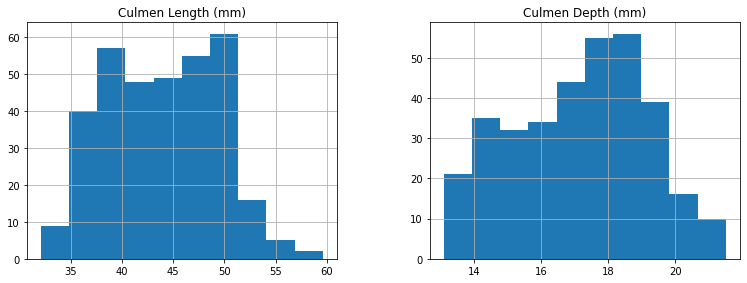

In [6]:
#collapse
_ = data.hist(figsize=(20,10),layout=(2,3))

Following plot is a pairplot for visualizating columns. We can observe the pattern of forming up of clusters with respect to the Species(colors). The distribution of *Length* vs *Depth* gives an idea of 3 clusters with respect to classes in Species. 

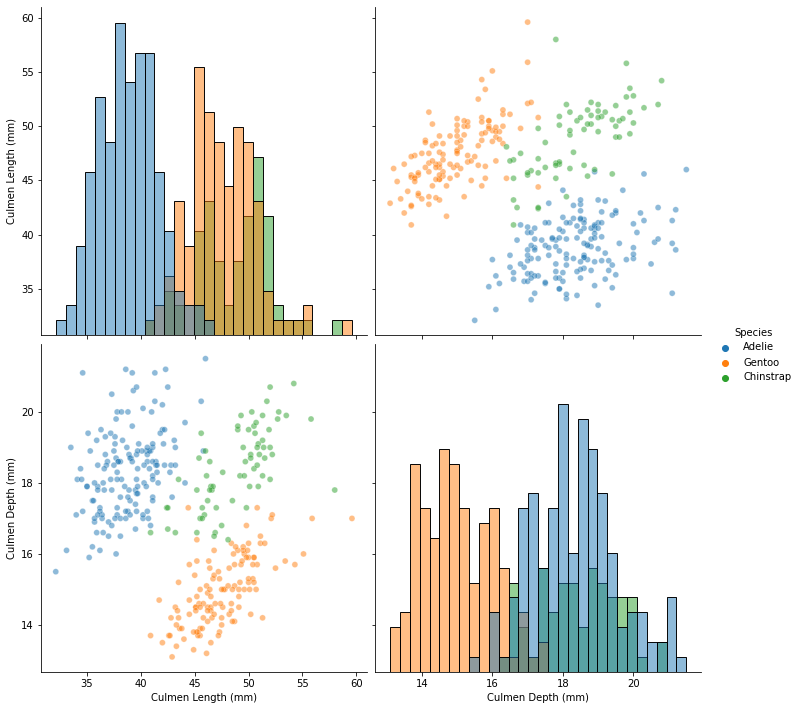

In [7]:
#collapse
import seaborn as sns
_ = sns.pairplot(data=data, hue="Species",plot_kws={'alpha': 0.5}, height=5, diag_kind='hist', diag_kws={'bins': 30})

On viewing the Culmen Length vs Culmen Depth distribution plot we can see that certain Species of Chinstrap fall nearer to Adelie class but this is what is observed from above. We may run classification or clustering algorithms(like **k-Nearest Neighbours**) to get more confident boundaries of classes/clusters. <br>
As we observe the distribution of points, the non-linear boundaries would be best to classify the classes. 

In [8]:
# collapse
import plotly.express as px

fig = px.scatter(data, x="Culmen Length (mm)", y="Culmen Depth (mm)", color="Species")
fig.show()

## (B) Fitting Scikit-learn model on numerical data
---

The following section contains the dataset and questions from the exercise M1.02 and M1.03.

In [9]:
adult_census = pd.read_csv("data/adult-census-numeric.csv")
train_data = adult_census.drop(columns='class')
target = adult_census["class"]

display(train_data.shape, adult_census.shape)

(39073, 4)

(39073, 5)

### B.1. K-Nearest Neighbours

In [10]:
#collapse
from sklearn import set_config
set_config(display='diagram')

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_data, target)

KNeighborsClassifier(n_neighbors=50)

Following image shows the mechanism behind *model.fit()*.The learning algorithm takes the training data and training target as input and sets the model states. These model states will be used later to either predict (for classifiers and regressors) or transform data (for transformers).  

![](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.fit.svg)

#### B.1.1 Training Accuracy

In [11]:
predictions = knn.predict(train_data[:10])

Following image shows the mechanism behind model.predict(). To predict, a model uses a prediction function that will use the input data together with the model states. As for the learning algorithm and the model states, the prediction function is specific for each type of model.

![](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.predict.svg)

In [12]:
#collapse
target_values = target.iloc[:10]
print( f"{(predictions == target_values).sum()}/{len(predictions)} " "of predictions are correct")

9/10 of predictions are correct


Checking accuracy by sklearn's .score() method,

In [13]:
knn.score(train_data, target)

0.8289867683566657

To compute the score, the predictor first computes the predictions (using the predict method) and then uses a scoring function to compare the true target y and the predictions. Finally, the score is returned.

![](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.score.svg)

#### B.1.2 Testing Accuracy

In [14]:
#collapse
test_dataset = pd.read_csv("data/adult-census-numeric-test.csv")
test_data = test_dataset.drop(columns="class")
target_test = test_dataset["class"]

In [15]:
print(knn.__class__.__name__," accuracy : ", knn.score(test_data, target_test))

KNeighborsClassifier  accuracy :  0.8182004299314157


The knn model performs good on test dataset. 

### B.2. Logistic Regression

In [16]:
#collapse
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target, random_state=62)

In [17]:
#collapse
lr = LogisticRegression()
lr.fit(X_train, Y_train)

score = lr.score(X_test, Y_test)
print("Accuracy : ",score)

Accuracy :  0.7973180468829972


In [18]:
print(lr.__class__.__name__," accuracy : ",lr.score(test_data, target_test))

LogisticRegression  accuracy :  0.8012079025488791


In this post we loaded the dataset, performed visualizations and modelling. The inital part of the notebook covered the insights and data inspection. Further we then explored scikit-learn module's K-NN and Logistic Regression models. Within the Logistic Regressiion model subsection we followed more **generalized** way of approaching machine learning problem.

- The next post will contain following sections w.r.t MOOC :

    - Preprocessing for numerical features
    - Model Evaluation uing Cross-Validation
    - Handling Categorical Data

- References : 

    1. [Scikit-learn MOOC](https://inria.github.io/scikit-learn-mooc/index.html)
    2. [Plotly](https://plotly.com/)

# Thank you!